<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-01-15 04:55:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  50.4MB/s    in 3.9s    

2026-01-15 04:55:36 (51.4 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


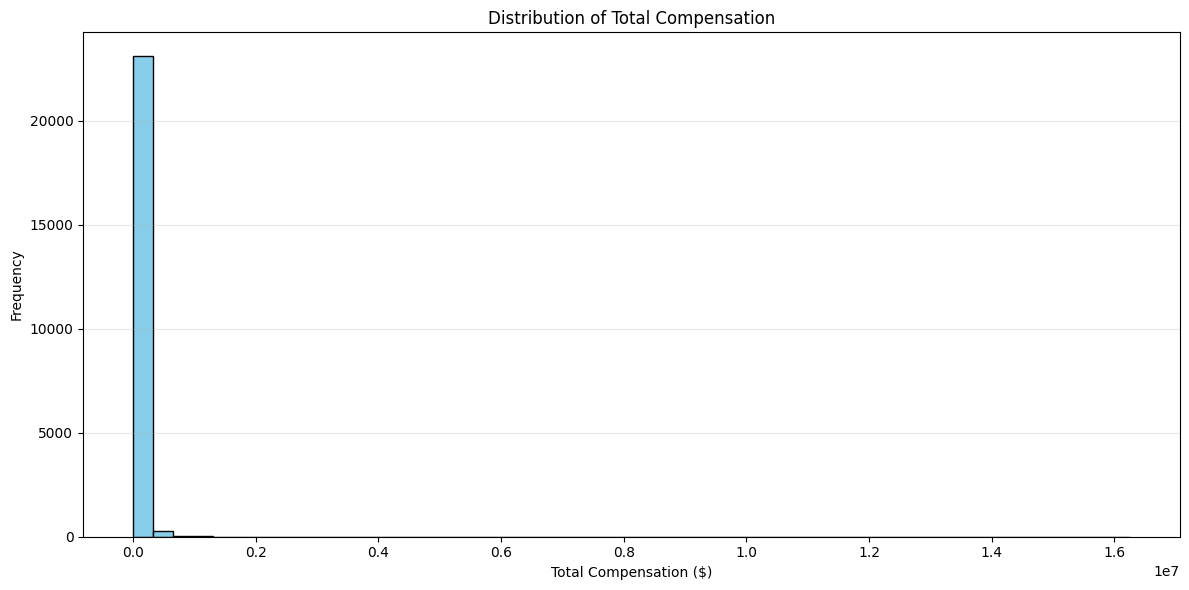


Compensation Statistics:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: CompTotal, dtype: float64


In [9]:
# Plot a histogram of CompTotal to visualize the distribution of respondents' total compensation
QUERY = """
SELECT ConvertedCompYearly as CompTotal
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""

df_comp = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12, 6))
plt.hist(df_comp['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation')
plt.xlabel('Total Compensation ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display statistics
print("\nCompensation Statistics:")
print(df_comp['CompTotal'].describe())

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


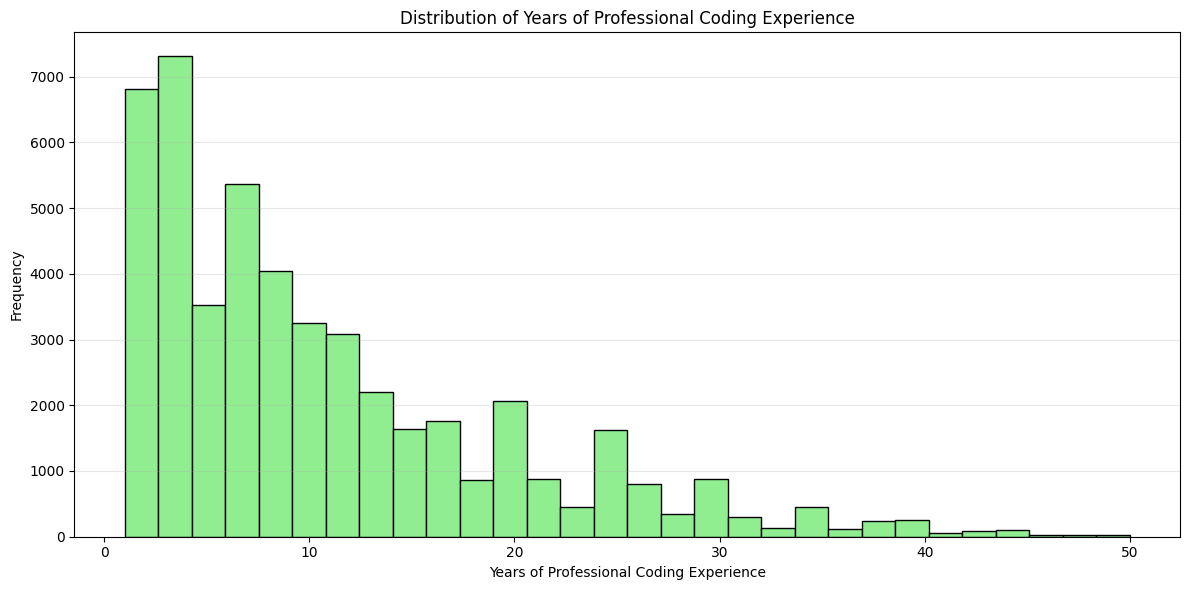


Years of Experience Statistics:
count    48704.000000
mean        10.739652
std          8.935175
min          1.000000
25%          4.000000
50%          8.000000
75%         15.000000
max         50.000000
Name: YearsCodePro_Numeric, dtype: float64


In [10]:
# Plot a histogram of YearsCodePro to analyze the distribution of coding experience
QUERY = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
"""

df_years = pd.read_sql_query(QUERY, conn)

# Convert to numeric
df_years['YearsCodePro_Numeric'] = pd.to_numeric(df_years['YearsCodePro'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.hist(df_years['YearsCodePro_Numeric'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display statistics
print("\nYears of Experience Statistics:")
print(df_years['YearsCodePro_Numeric'].describe())

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


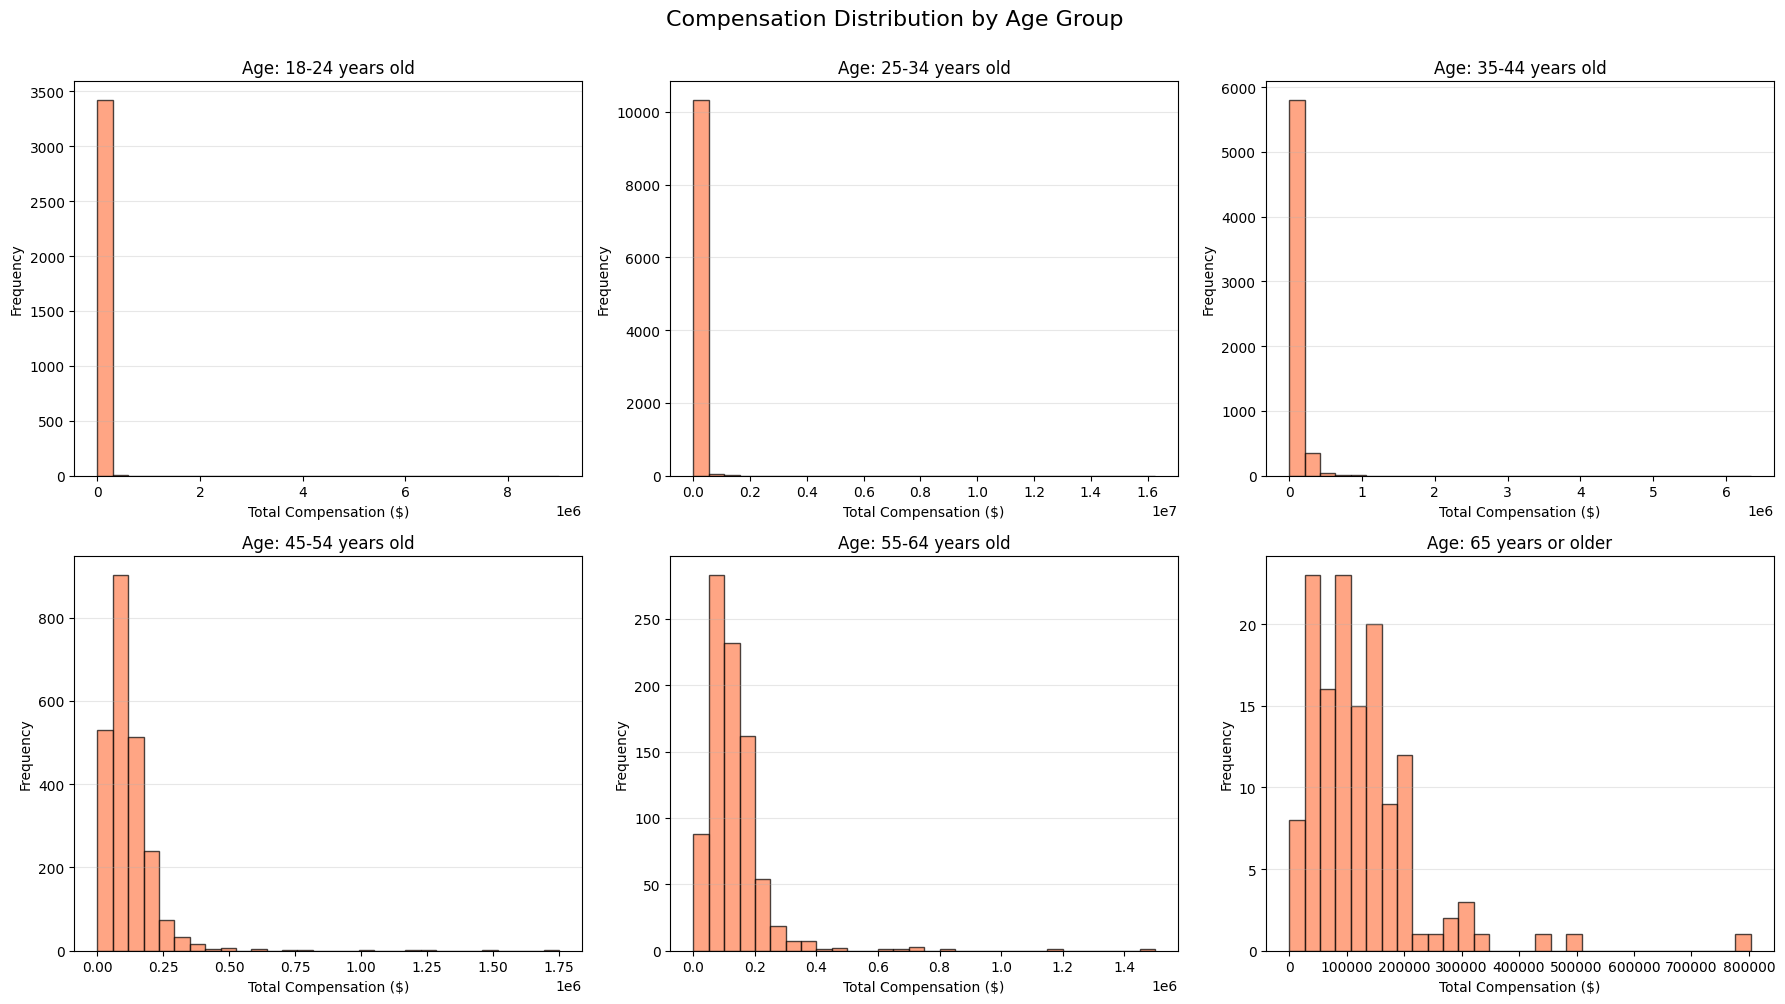

In [11]:
# Use histograms to compare the distribution of CompTotal across different Age groups
QUERY = """
SELECT Age, ConvertedCompYearly as CompTotal
FROM main
WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""

df_age_comp = pd.read_sql_query(QUERY, conn)

# Get unique age groups
age_groups = df_age_comp['Age'].unique()

# Create subplots for each age group
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, age_group in enumerate(sorted(age_groups)[:6]):  # Show first 6 age groups
    age_data = df_age_comp[df_age_comp['Age'] == age_group]['CompTotal']
    axes[idx].hist(age_data, bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Age: {age_group}')
    axes[idx].set_xlabel('Total Compensation ($)')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Compensation Distribution by Age Group', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


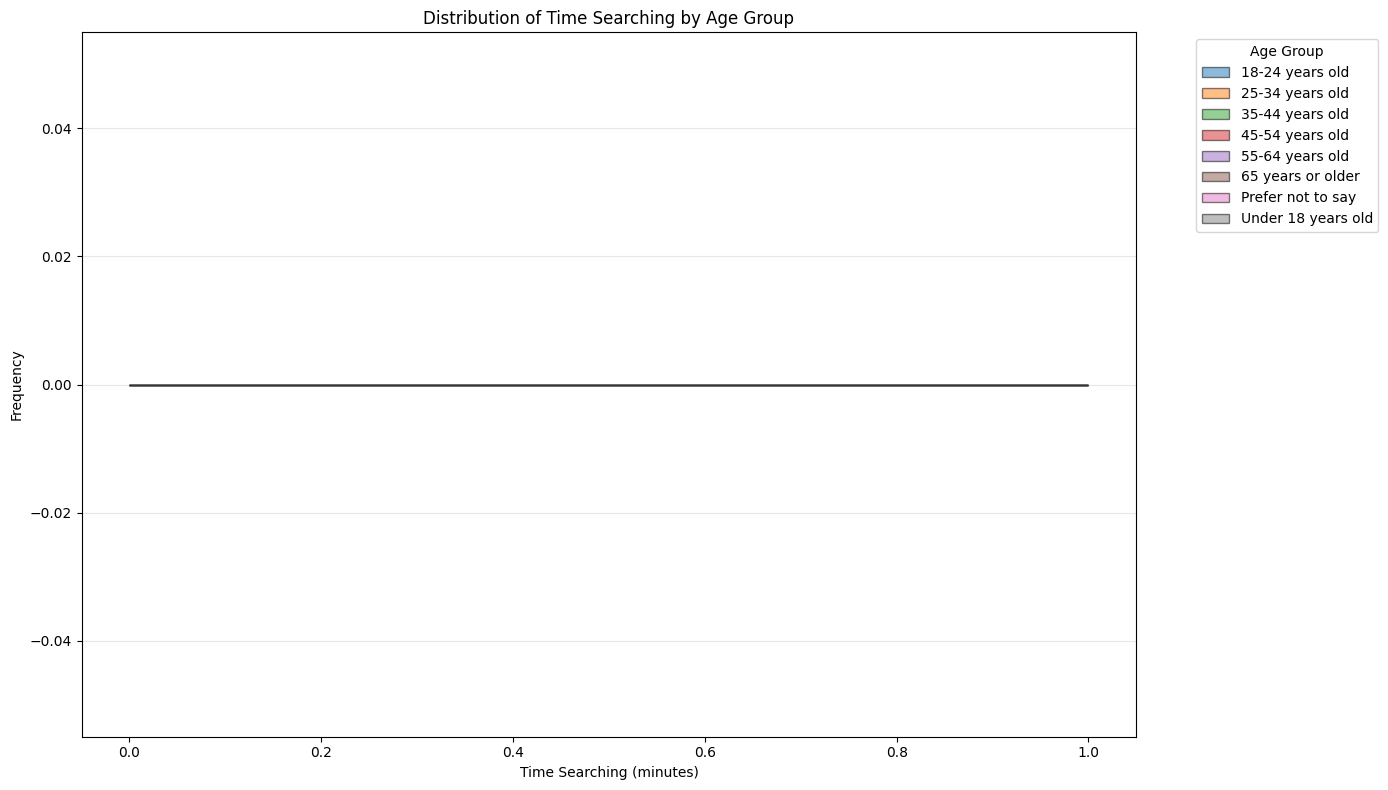

In [12]:
# Use histograms to explore the distribution of TimeSearching for respondents across different age groups
QUERY = """
SELECT Age, TimeSearching
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL
"""

df_time_age = pd.read_sql_query(QUERY, conn)

# Convert TimeSearching to numeric
df_time_age['TimeSearching_Numeric'] = pd.to_numeric(df_time_age['TimeSearching'], errors='coerce')

# Get unique age groups
age_groups = df_time_age['Age'].unique()

# Create overlaid histogram
plt.figure(figsize=(14, 8))

for age_group in sorted(age_groups):
    age_data = df_time_age[df_time_age['Age'] == age_group]['TimeSearching_Numeric'].dropna()
    plt.hist(age_data, bins=20, alpha=0.5, label=age_group, edgecolor='black')

plt.title('Distribution of Time Searching by Age Group')
plt.xlabel('Time Searching (minutes)')
plt.ylabel('Frequency')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


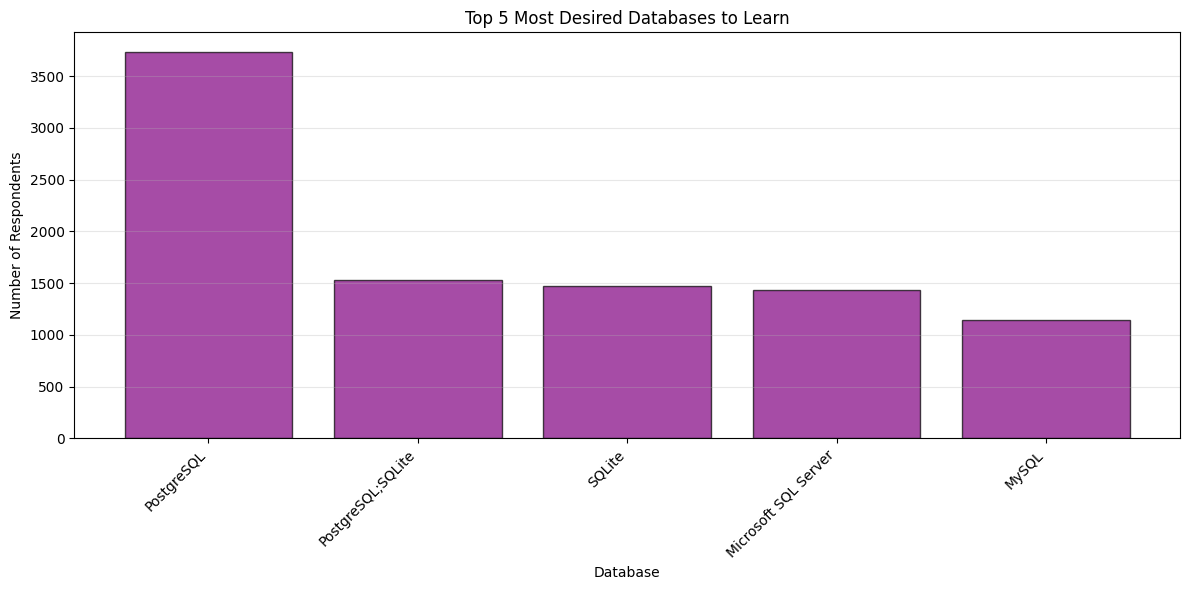


Top 5 Databases:
  DatabaseWantToWorkWith  count
0             PostgreSQL   3738
1      PostgreSQL;SQLite   1533
2                 SQLite   1476
3   Microsoft SQL Server   1431
4                  MySQL   1139


In [13]:
# Visualize the most desired databases for future learning using a histogram of the top 5 databases
QUERY = """
SELECT DatabaseWantToWorkWith, COUNT(*) as count
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
GROUP BY DatabaseWantToWorkWith
ORDER BY count DESC
LIMIT 5
"""

df_databases = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12, 6))
plt.bar(df_databases['DatabaseWantToWorkWith'], df_databases['count'], 
        color='purple', edgecolor='black', alpha=0.7)
plt.title('Top 5 Most Desired Databases to Learn')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 5 Databases:")
print(df_databases)

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


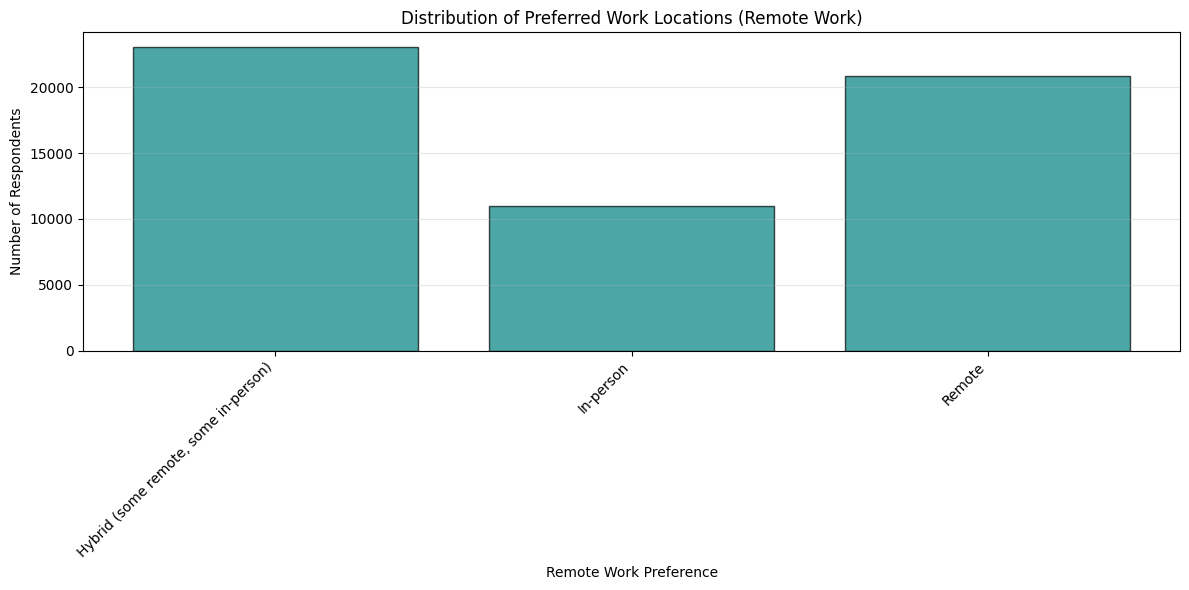


Remote Work Distribution:
                             RemoteWork  count
0  Hybrid (some remote, some in-person)  23015
1                             In-person  10960
2                                Remote  20831


In [14]:
# Use a histogram to explore the distribution of preferred work arrangements (remote work)
QUERY = """
SELECT RemoteWork, COUNT(*) as count
FROM main
WHERE RemoteWork IS NOT NULL
GROUP BY RemoteWork
"""

df_remote = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12, 6))
plt.bar(df_remote['RemoteWork'], df_remote['count'], 
        color='teal', edgecolor='black', alpha=0.7)
plt.title('Distribution of Preferred Work Locations (Remote Work)')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nRemote Work Distribution:")
print(df_remote)

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


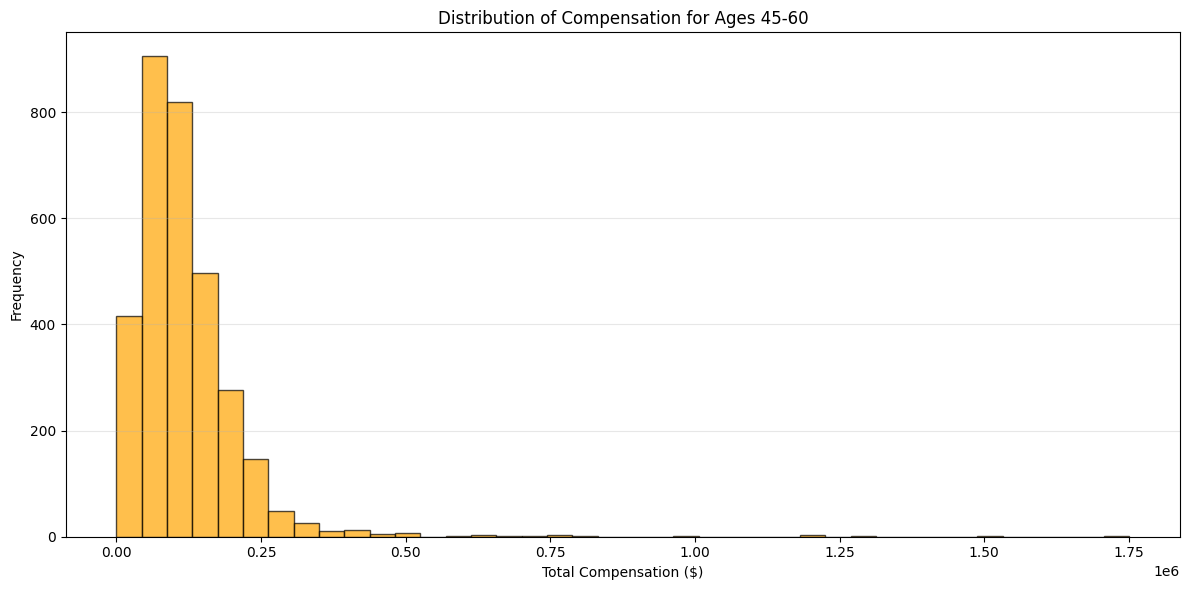


Median Compensation for Ages 45-60: $101,910.00

Statistics:
count    3.192000e+03
mean     1.204379e+05
std      1.063499e+05
min      1.000000e+00
25%      6.444400e+04
50%      1.019100e+05
75%      1.510502e+05
max      1.750749e+06
Name: CompTotal, dtype: float64


In [15]:
# Plot the histogram for CompTotal within the age group 45 to 60
QUERY = """
SELECT ConvertedCompYearly as CompTotal
FROM main
WHERE Age IN ('45-54 years old', '55-64 years old')
  AND ConvertedCompYearly IS NOT NULL
"""

df_mid_career = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12, 6))
plt.hist(df_mid_career['CompTotal'], bins=40, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Compensation for Ages 45-60')
plt.xlabel('Total Compensation ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and display median
median_comp = df_mid_career['CompTotal'].median()
print(f"\nMedian Compensation for Ages 45-60: ${median_comp:,.2f}")
print("\nStatistics:")
print(df_mid_career['CompTotal'].describe())

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
